In [ ]:
# Let's start by retrieving some Magic card images using the Scryfall API
# https://scryfall.com/docs/api
# We'll be using the Scryfall python library
# https://github.com/NandaScott/Scrython

In [1]:
import requests
from requests.exceptions import TooManyRedirects, ReadTimeout, ConnectionError
import json
import pprint
import time
import shutil
import os
import os.path
import glob
import csv
from PIL import Image
import random
import numpy as np
import errno
import mxnet as mx
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

URL='https://api.scryfall.com'
OUTDIR='/Users/agussman/Documents/DeepLens/deeplens-magiccards/data'
#OUTDIR='/Users/aarongussman/Documents/Personal/deeplens-magiccards/data'

In [3]:
# Get a list of sets
r = requests.get('https://api.scryfall.com/sets')
sets = r.json()['data']
sets[:2]
print(f"Number of sets: {len(sets)}")

Number of sets: 499


In [23]:
def download_card_images(results, odir, limit=99999):
    for result in results[:limit]:
        #card = result
        #if 'all_parts' in result
        #print(result['image_uris']['png'])
        time.sleep(0.25)
        image_url = result['image_uris']['png']
        filename = "{}_{num:03d}.png".format(result['set'], num=int(result['collector_number']))
        filename = os.path.join(odir, filename)
        print(filename)
        print("{} -> {}".format(image_url, filename))

        r = requests.get(image_url, stream=True)

        with open(filename, 'wb') as fd:
            for chunk in r.iter_content(chunk_size=128):
                fd.write(chunk)
    
    '''
    if r.status_code == 200:
        with open(os.path.join(OUTDIR, result['set'], filename), 'wb') as out_file:
            shutil.copyfileobj(response.raw(), out_file)
    else:
        print("Nope. {}".format(response.status_code))
    '''
    
    
#pprint.pprint(results[0:2])

In [24]:
for aset in sets[:1]:
    print(aset['name'])
    print(aset['search_uri'])
    #r = requests.get('https://api.scryfall.com/cards/search?order=set&q=e:dom')
    r = requests.get(aset['search_uri'])
    
    odir = os.path.join(OUTDIR, aset['code'])
    if not os.path.exists(odir):
        os.makedirs(odir)
    
    download_card_images(r.json()['data'], odir, 99)
# TODO: Support Scryfall pagination: https://scryfall.com/docs/api/lists

Commander 2018
https://api.scryfall.com/cards/search?order=set&q=e%3Ac18&unique=prints
/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_002.png
https://img.scryfall.com/cards/png/en/c18/2.png?1532512532 -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_002.png
/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_003.png
https://img.scryfall.com/cards/png/en/c18/3.png?1532514531 -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_003.png
/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_007.png
https://img.scryfall.com/cards/png/en/c18/7.png?1532433599 -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_007.png
/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_008.png
https://img.scryfall.com/cards/png/en/c18/8.png?1532515624 -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_008.png
/Users/aarongussman/Docum

/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_053.png
https://img.scryfall.com/cards/png/en/c18/53.png?1532433723 -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_053.png
/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_054.png
https://img.scryfall.com/cards/png/en/c18/54.png?1532306335 -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_054.png
/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_055.png
https://img.scryfall.com/cards/png/en/c18/55.png?1532447776 -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_055.png
/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_056.png
https://img.scryfall.com/cards/png/en/c18/56.png?1532257157 -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_056.png
/Users/aarongussman/Documents/Personal/deeplens-magiccards/data/c18/c18_057.png
https://img.scryfall.com/car

In [25]:
# Next let's download some pictures of tables
# TODO: Don't download HTML as a JPG
table_list_url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03201035'
r = requests.get(table_list_url)

file_urls = r.text.splitlines()

In [32]:
for num, table_url in enumerate(file_urls):
    print(num, table_url)
    time.sleep(0.25)
    filename = "{num:003d}_{original}".format(num=num, original=os.path.basename(table_url))
    filename = os.path.join(OUTDIR, 'tables', filename)
    #print(filename)
    print("{} -> {}".format(table_url, filename))
    
    try:
        r = requests.get(table_url, stream=True, timeout=1)
        if r.status_code == 200:
            print(r.headers['content-type'])
            if r.headers['content-type'].startswith("image"):
                print(r.url)
                if not r.url.endswith('photo_unavailable.png'):
                    with open(filename, 'wb') as fd:
                        for chunk in r.iter_content(chunk_size=128):
                            fd.write(chunk)
                else:
                    print("SKIP: photo_unavailable.png")
            else:
                print("SKIP: content header didn't start with image? {}".format(r.headers['content-type']))
        else:
            print("SKIP: Problem downloading: {}".format(r.status_code))
    except TooManyRedirects:
        print("SKIP: TooManyRedirects")
    except ReadTimeout:
        print("SKIP: ReadTimeout")
    except ConnectionError:
        print("SKIP: ConnectionError")
    


(0, u'http://www.american-furniture-warehouse.com/images/Furniture/stsk4872t.jpg')
http://www.american-furniture-warehouse.com/images/Furniture/stsk4872t.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/000_stsk4872t.jpg
SKIP: ConnectionError
(1, u'http://farm3.static.flickr.com/2094/2156394956_636a8e82b7.jpg')
http://farm3.static.flickr.com/2094/2156394956_636a8e82b7.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/001_2156394956_636a8e82b7.jpg
image/jpeg
http://farm3.static.flickr.com/2094/2156394956_636a8e82b7.jpg
(2, u'http://farm1.static.flickr.com/119/255091104_0110d3fb49.jpg')
http://farm1.static.flickr.com/119/255091104_0110d3fb49.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/002_255091104_0110d3fb49.jpg
image/jpeg
http://farm1.static.flickr.com/119/255091104_0110d3fb49.jpg
(3, u'http://farm1.static.flickr.com/183/424762396_89fdd67fae.jpg')
http://farm1.static.flickr.com/183/424762396_89fd

http://farm3.static.flickr.com/2178/2393580040_c8a28cf600.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/027_2393580040_c8a28cf600.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(28, u'http://farm1.static.flickr.com/146/370690647_7098e00b00.jpg')
http://farm1.static.flickr.com/146/370690647_7098e00b00.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/028_370690647_7098e00b00.jpg
image/jpeg
http://farm1.static.flickr.com/146/370690647_7098e00b00.jpg
(29, u'http://farm3.static.flickr.com/2171/1797451670_d984ca715e.jpg')
http://farm3.static.flickr.com/2171/1797451670_d984ca715e.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/029_1797451670_d984ca715e.jpg
image/jpeg
http://farm3.static.flickr.com/2171/1797451670_d984ca715e.jpg
(30, u'http://www.rachelleb.com/images/2004_03_20/dining_room_table.jpg')
http://www.rachelleb.com/images/2004_03_20/dining_ro

http://www.gowfb.ca/images/imagecache/Bayside-Dining.1168936299.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/053_Bayside-Dining.1168936299.jpg
SKIP: Problem downloading: 404
(54, u'http://farm1.static.flickr.com/98/257023845_81fe65e6de.jpg')
http://farm1.static.flickr.com/98/257023845_81fe65e6de.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/054_257023845_81fe65e6de.jpg
image/jpeg
http://farm1.static.flickr.com/98/257023845_81fe65e6de.jpg
(55, u'http://www.designhousefurniture.net/Furniture/Furniture/Diningroomtable.jpg')
http://www.designhousefurniture.net/Furniture/Furniture/Diningroomtable.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/055_Diningroomtable.jpg
SKIP: Problem downloading: 404
(56, u'http://farm1.static.flickr.com/20/70975059_d59a4c2c6a.jpg')
http://farm1.static.flickr.com/20/70975059_d59a4c2c6a.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/056_

image/jpeg
http://farm3.static.flickr.com/2375/2111123936_1119b66c5f.jpg
(80, u'http://farm1.static.flickr.com/111/295942346_dcb0e72e80.jpg')
http://farm1.static.flickr.com/111/295942346_dcb0e72e80.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/080_295942346_dcb0e72e80.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(81, u'http://farm1.static.flickr.com/83/231187440_e886fc9a8c.jpg')
http://farm1.static.flickr.com/83/231187440_e886fc9a8c.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/081_231187440_e886fc9a8c.jpg
image/jpeg
http://farm1.static.flickr.com/83/231187440_e886fc9a8c.jpg
(82, u'http://www.amishfurniturewisconsin.com/images/attictreasures2.jpg')
http://www.amishfurniturewisconsin.com/images/attictreasures2.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/082_attictreasures2.jpg
SKIP: Problem downloading: 503
(83, u'http://www.bluebaycrete

http://farm1.static.flickr.com/113/262665876_418062f258.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/107_262665876_418062f258.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(108, u'http://farm3.static.flickr.com/2382/1945239064_8609c88fe6.jpg')
http://farm3.static.flickr.com/2382/1945239064_8609c88fe6.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/108_1945239064_8609c88fe6.jpg
image/jpeg
http://farm3.static.flickr.com/2382/1945239064_8609c88fe6.jpg
(109, u'http://farm1.static.flickr.com/5/7949908_5ba183f5e9.jpg')
http://farm1.static.flickr.com/5/7949908_5ba183f5e9.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/109_7949908_5ba183f5e9.jpg
image/jpeg
http://farm1.static.flickr.com/5/7949908_5ba183f5e9.jpg
(110, u'http://www.intermountainbilliard.com/pokertable_files/01-TR95-BP5-TT-lg.jpg')
http://www.intermountainbilliard.com/pokertable_files/0

image/jpeg
http://farm4.static.flickr.com/3246/2745107606_34e8d3dc4d.jpg
(135, u'http://farm4.static.flickr.com/3053/2640826332_24fbb2cbe0.jpg')
http://farm4.static.flickr.com/3053/2640826332_24fbb2cbe0.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/135_2640826332_24fbb2cbe0.jpg
image/jpeg
http://farm4.static.flickr.com/3053/2640826332_24fbb2cbe0.jpg
(136, u'http://www.peoplesfurniture.net/images_products/4466_small.jpg')
http://www.peoplesfurniture.net/images_products/4466_small.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/136_4466_small.jpg
SKIP: ReadTimeout
(137, u'http://farm4.static.flickr.com/3279/2736956676_0be2f2b968.jpg')
http://farm4.static.flickr.com/3279/2736956676_0be2f2b968.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/137_2736956676_0be2f2b968.jpg
image/jpeg
http://farm4.static.flickr.com/3279/2736956676_0be2f2b968.jpg
(138, u'http://www.myartsandcrafts.com/images/170pic783.jp

(163, u'http://www.ncfurniturediscounters.com/furniture/files/tn/t_32155.jpg')
http://www.ncfurniturediscounters.com/furniture/files/tn/t_32155.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/163_t_32155.jpg
SKIP: Problem downloading: 500
(164, u'http://www.southerndesignsfurniture.com/media/dinechatham.jpg')
http://www.southerndesignsfurniture.com/media/dinechatham.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/164_dinechatham.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(165, u'http://farm1.static.flickr.com/24/38583307_6536904f9c.jpg')
http://farm1.static.flickr.com/24/38583307_6536904f9c.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/165_38583307_6536904f9c.jpg
image/jpeg
http://farm1.static.flickr.com/24/38583307_6536904f9c.jpg
(166, u'http://static.flickr.com/1420/1457789393_749ac0f9ea.jpg')
http://static.flickr.com/1420/1457789393_749

http://farm4.static.flickr.com/3228/2302486401_72814f50ff.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/190_2302486401_72814f50ff.jpg
image/jpeg
http://farm4.static.flickr.com/3228/2302486401_72814f50ff.jpg
(191, u'http://farm1.static.flickr.com/101/289336037_8cd44acffa.jpg')
http://farm1.static.flickr.com/101/289336037_8cd44acffa.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/191_289336037_8cd44acffa.jpg
image/jpeg
http://farm1.static.flickr.com/101/289336037_8cd44acffa.jpg
(192, u'http://www.feldmanfurniture.com/pthumbs/%7b9257D55D-5752-462B-9EB0-926B655E8C4A%7d.jpg')
http://www.feldmanfurniture.com/pthumbs/%7b9257D55D-5752-462B-9EB0-926B655E8C4A%7d.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/192_%7b9257D55D-5752-462B-9EB0-926B655E8C4A%7d.jpg
SKIP: Problem downloading: 404
(193, u'http://farm3.static.flickr.com/2265/1916326148_d53f7b0d00.jpg')
http://farm3.static.flickr.com/2265/191632614

image/jpeg
http://farm3.static.flickr.com/2180/1805599237_295917206f.jpg
(218, u'http://www.carolinamooninc.us/images/TablePopSunDiningRoom.jpg')
http://www.carolinamooninc.us/images/TablePopSunDiningRoom.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/218_TablePopSunDiningRoom.jpg
SKIP: Problem downloading: 503
(219, u'http://farm3.static.flickr.com/2047/2541981839_517c8bf1cb.jpg')
http://farm3.static.flickr.com/2047/2541981839_517c8bf1cb.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/219_2541981839_517c8bf1cb.jpg
image/jpeg
http://farm3.static.flickr.com/2047/2541981839_517c8bf1cb.jpg
(220, u'http://farm1.static.flickr.com/115/315239104_a30dc1edbd.jpg')
http://farm1.static.flickr.com/115/315239104_a30dc1edbd.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/220_315239104_a30dc1edbd.jpg
image/jpeg
http://farm1.static.flickr.com/115/315239104_a30dc1edbd.jpg
(221, u'http://farm1.static.flickr.com/13

image/jpeg
http://farm2.static.flickr.com/1050/834227537_c859b1834f.jpg
(245, u'http://www.connellswoodfurniture.com/uploads/products/auto-gen-images/thumb-E%20%20Dining%20Room%20Table.jpg')
http://www.connellswoodfurniture.com/uploads/products/auto-gen-images/thumb-E%20%20Dining%20Room%20Table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/245_thumb-E%20%20Dining%20Room%20Table.jpg
SKIP: ReadTimeout
(246, u'http://www.home123furniture.com/e-store/media/prod_M/dining_room_M.jpg')
http://www.home123furniture.com/e-store/media/prod_M/dining_room_M.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/246_dining_room_M.jpg
SKIP: ConnectionError
(247, u'http://lh3.ggpht.com/_4Xj3KvHXRsc/SFqyx7jJCVI/AAAAAAAACu4/Mks1Yeoz5AI/DSCN0200.JPG')
http://lh3.ggpht.com/_4Xj3KvHXRsc/SFqyx7jJCVI/AAAAAAAACu4/Mks1Yeoz5AI/DSCN0200.JPG -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/247_DSCN0200.JPG
image/jpeg
http://lh3.ggpht.

http://farm4.static.flickr.com/3006/2584888092_92b7f4bbff.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/271_2584888092_92b7f4bbff.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(272, u'http://farm4.static.flickr.com/3140/2282185109_2021c73caf.jpg')
http://farm4.static.flickr.com/3140/2282185109_2021c73caf.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/272_2282185109_2021c73caf.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(273, u'http://static.flickr.com/2261/2049539613_09cc137556.jpg')
http://static.flickr.com/2261/2049539613_09cc137556.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/273_2049539613_09cc137556.jpg
image/jpeg
http://static.flickr.com/2261/2049539613_09cc137556.jpg
(274, u'http://farm1.static.flickr.com/36/79873236_3c52851db1.jpg')
http://farm1.static.flickr.com/36/79873236_3c

http://www.modishdecor.com/images/ash_furniture/Dining%20Room/Traditional/wigeon_hall_dining_s.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/298_wigeon_hall_dining_s.jpg
SKIP: ReadTimeout
(299, u'http://farm1.static.flickr.com/41/125687414_dc41f775c0.jpg')
http://farm1.static.flickr.com/41/125687414_dc41f775c0.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/299_125687414_dc41f775c0.jpg
image/jpeg
http://farm1.static.flickr.com/41/125687414_dc41f775c0.jpg
(300, u'http://www.pioneerhandcraft.ca/pinetrestletable.jpg')
http://www.pioneerhandcraft.ca/pinetrestletable.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/300_pinetrestletable.jpg
SKIP: Problem downloading: 404
(301, u'http://www.gowfb.ca/images/imagecache/bonparte%20pesdestal%20table.JPG')
http://www.gowfb.ca/images/imagecache/bonparte%20pesdestal%20table.JPG -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/301_bonpa

http://www.gowfb.com/images/imagecache/Light_Pub_Height.JPG -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/327_Light_Pub_Height.JPG
SKIP: Problem downloading: 404
(328, u'http://farm1.static.flickr.com/34/70184838_ba9a700687.jpg')
http://farm1.static.flickr.com/34/70184838_ba9a700687.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/328_70184838_ba9a700687.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(329, u'http://www.worldfurniture.co.uk/images/product/home/slatted2.jpg')
http://www.worldfurniture.co.uk/images/product/home/slatted2.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/329_slatted2.jpg
text/html; charset=UTF-8
SKIP: content header didn't start with image? text/html; charset=UTF-8
(330, u'http://www.beiters.com/images/dining3_sm.jpg')
http://www.beiters.com/images/dining3_sm.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccard

http://farm1.static.flickr.com/30/66505616_583f67bc2a.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/354_66505616_583f67bc2a.jpg
image/jpeg
http://farm1.static.flickr.com/30/66505616_583f67bc2a.jpg
(355, u'http://www.thefurniture.com/store/Images/MGSN/Joplin/D1001-set.jpg')
http://www.thefurniture.com/store/Images/MGSN/Joplin/D1001-set.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/355_D1001-set.jpg
text/html; charset=UTF-8
SKIP: content header didn't start with image? text/html; charset=UTF-8
(356, u'http://www.ishop.co.uk/ishop/images/1053/MI_Bistro_Dining_Table.JPG')
http://www.ishop.co.uk/ishop/images/1053/MI_Bistro_Dining_Table.JPG -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/356_MI_Bistro_Dining_Table.JPG
text/html
SKIP: content header didn't start with image? text/html
(357, u'http://farm1.static.flickr.com/7/9360124_5b888f9eab.jpg')
http://farm1.static.flickr.com/7/9360124_5b888f9eab.jpg 

http://farm1.static.flickr.com/223/459870278_75e7cb428d.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/381_459870278_75e7cb428d.jpg
image/jpeg
http://farm1.static.flickr.com/223/459870278_75e7cb428d.jpg
(382, u'http://cdn.mydeco.com/product_images/www.arenafurniture.co.uk/pp/Dining_Room/Marble_Travertine_Dining_Tables/images/Roma_table_main_270.jpg')
http://cdn.mydeco.com/product_images/www.arenafurniture.co.uk/pp/Dining_Room/Marble_Travertine_Dining_Tables/images/Roma_table_main_270.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/382_Roma_table_main_270.jpg
SKIP: Problem downloading: 404
(383, u'http://farm2.static.flickr.com/1092/1317061582_d55fd0c648.jpg')
http://farm2.static.flickr.com/1092/1317061582_d55fd0c648.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/383_1317061582_d55fd0c648.jpg
image/jpeg
http://farm2.static.flickr.com/1092/1317061582_d55fd0c648.jpg
(384, u'http://www.debtsmart.com

text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(408, u'http://farm1.static.flickr.com/158/437129011_7137b6788e.jpg')
http://farm1.static.flickr.com/158/437129011_7137b6788e.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/408_437129011_7137b6788e.jpg
image/jpeg
http://farm1.static.flickr.com/158/437129011_7137b6788e.jpg
(409, u'http://farm2.static.flickr.com/1124/1022318928_a55dbaae36.jpg')
http://farm2.static.flickr.com/1124/1022318928_a55dbaae36.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/409_1022318928_a55dbaae36.jpg
image/jpeg
http://farm2.static.flickr.com/1124/1022318928_a55dbaae36.jpg
(410, u'http://farm4.static.flickr.com/3066/2469052419_cef82d55a5.jpg')
http://farm4.static.flickr.com/3066/2469052419_cef82d55a5.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/410_2469052419_cef82d55a5.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_

SKIP: Problem downloading: 404
(436, u'http://farm2.static.flickr.com/1060/532976410_167fd3b8a8.jpg')
http://farm2.static.flickr.com/1060/532976410_167fd3b8a8.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/436_532976410_167fd3b8a8.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(437, u'http://static.flickr.com/120/276851908_5da4400208.jpg')
http://static.flickr.com/120/276851908_5da4400208.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/437_276851908_5da4400208.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(438, u'http://www.vermontwoods.com/LFC/DiningRoom/high-tall-kitchen-cafe-table-espresso-cherry-tones-sheaf-back-barstool.jpg')
http://www.vermontwoods.com/LFC/DiningRoom/high-tall-kitchen-cafe-table-espresso-cherry-tones-sheaf-back-barstool.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/438

text/html; charset=UTF-8
SKIP: content header didn't start with image? text/html; charset=UTF-8
(462, u'http://www.theinteriorgallery.com/prod_images_large/B-6181.jpg')
http://www.theinteriorgallery.com/prod_images_large/B-6181.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/462_B-6181.jpg
image/jpeg
http://www.theinteriorgallery.com/prod_images_large/B-6181.jpg
(463, u'http://www.ewfmodern.com/images/table.jpg')
http://www.ewfmodern.com/images/table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/463_table.jpg
SKIP: Problem downloading: 404
(464, u'http://www.phdrentals.com.au/graphics/dining-room-furniture.jpg')
http://www.phdrentals.com.au/graphics/dining-room-furniture.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/464_dining-room-furniture.jpg
SKIP: Problem downloading: 403
(465, u'http://farm2.static.flickr.com/1183/701302889_b458d993db.jpg')
http://farm2.static.flickr.com/1183/701302889_b4

image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(490, u'http://www.roomsbyus.com/furniture/Casual-dining-Kitchen/casual-dining/01-120551-SETA.jpg')
http://www.roomsbyus.com/furniture/Casual-dining-Kitchen/casual-dining/01-120551-SETA.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/490_01-120551-SETA.jpg
SKIP: Problem downloading: 400
(491, u'http://www.artistryhome.com/ProductImages/storepics/dining_table.jpg')
http://www.artistryhome.com/ProductImages/storepics/dining_table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/491_dining_table.jpg
SKIP: Problem downloading: 403
(492, u'http://www.selectfloridavacation.com/pix/6040/6040diningroom.jpg')
http://www.selectfloridavacation.com/pix/6040/6040diningroom.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/492_6040diningroom.jpg
text/html
SKIP: content header didn't start with image? text/html
(493, u'ht

SKIP: Problem downloading: 404
(518, u'http://www.chalets-village.com/img/photofen/1835b1.jpg')
http://www.chalets-village.com/img/photofen/1835b1.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/518_1835b1.jpg
image/jpeg
https://www.chalets-village.com/img/photofen/1835b1.jpg
(519, u'http://www.muskokafurniture.net/images/dining/dining_premium.jpg')
http://www.muskokafurniture.net/images/dining/dining_premium.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/519_dining_premium.jpg
SKIP: Problem downloading: 404
(520, u'http://www.bedroomfurnitureusa.com/catalogimg/groups/thumbs/737-a.jpg')
http://www.bedroomfurnitureusa.com/catalogimg/groups/thumbs/737-a.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/520_737-a.jpg
SKIP: Problem downloading: 403
(521, u'http://www.fitzdecarts.com/images/Hile%20Studios/dining/5_leg_table%20small.jpg')
http://www.fitzdecarts.com/images/Hile%20Studios/dining/5_leg_tabl

image/jpeg
http://www.mdontigny.com/images/donandmarilyn/ddt_5_03_dining_table.jpg
(545, u'http://farm4.static.flickr.com/3087/2551971398_af3e4d1676.jpg')
http://farm4.static.flickr.com/3087/2551971398_af3e4d1676.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/545_2551971398_af3e4d1676.jpg
image/jpeg
http://farm4.static.flickr.com/3087/2551971398_af3e4d1676.jpg
(546, u'http://farm1.static.flickr.com/147/334718749_87b4ae7105.jpg')
http://farm1.static.flickr.com/147/334718749_87b4ae7105.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/546_334718749_87b4ae7105.jpg
image/jpeg
http://farm1.static.flickr.com/147/334718749_87b4ae7105.jpg
(547, u'http://www.indiamart.com/renaissanceexports/pcat-gifs/products-small/dining-room-furniture.jpg')
http://www.indiamart.com/renaissanceexports/pcat-gifs/products-small/dining-room-furniture.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/547_dining-room-furniture.jp

(572, u'http://www.guadalajarafurniture.com/diningrooms/table1.jpg')
http://www.guadalajarafurniture.com/diningrooms/table1.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/572_table1.jpg
SKIP: ReadTimeout
(573, u'http://members.iinet.com.au/~coakeley/proform/table.gif')
http://members.iinet.com.au/~coakeley/proform/table.gif -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/573_table.gif
SKIP: ConnectionError
(574, u'http://www.homelement.com/images/md_1371-36-TABLE.jpg')
http://www.homelement.com/images/md_1371-36-TABLE.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/574_md_1371-36-TABLE.jpg
SKIP: Problem downloading: 403
(575, u'http://farm4.static.flickr.com/3079/2475789603_20fde51f39.jpg')
http://farm4.static.flickr.com/3079/2475789603_20fde51f39.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/575_2475789603_20fde51f39.jpg
image/jpeg
http://farm4.static.flickr.com/3079/

SKIP: Problem downloading: 503
(598, u'http://buyfurniturenow.co.uk/images/categories/rydaldiningshot.jpg')
http://buyfurniturenow.co.uk/images/categories/rydaldiningshot.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/598_rydaldiningshot.jpg
SKIP: Problem downloading: 503
(599, u'http://farm4.static.flickr.com/3267/2731365941_d3b8b57a58.jpg')
http://farm4.static.flickr.com/3267/2731365941_d3b8b57a58.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/599_2731365941_d3b8b57a58.jpg
image/jpeg
http://farm4.static.flickr.com/3267/2731365941_d3b8b57a58.jpg
(600, u'http://www.pgmod.com/images/dr_main_dining%20tables.gif')
http://www.pgmod.com/images/dr_main_dining%20tables.gif -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/600_dr_main_dining%20tables.gif
SKIP: ReadTimeout
(601, u'http://farm4.static.flickr.com/3107/2569198592_b64beb25c1.jpg')
http://farm4.static.flickr.com/3107/2569198592_b64beb25c1.jpg -> /U

SKIP: Problem downloading: 404
(626, u'http://farm2.static.flickr.com/1168/1457789611_d6cfb065ba.jpg')
http://farm2.static.flickr.com/1168/1457789611_d6cfb065ba.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/626_1457789611_d6cfb065ba.jpg
image/jpeg
http://farm2.static.flickr.com/1168/1457789611_d6cfb065ba.jpg
(627, u'http://www.bootwoodcarvers.com/Images/Thumbnails/Furniture/tables/Harvest-Dining-Table.jpg')
http://www.bootwoodcarvers.com/Images/Thumbnails/Furniture/tables/Harvest-Dining-Table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/627_Harvest-Dining-Table.jpg
SKIP: Problem downloading: 503
(628, u'http://www.thebedroomspace.com/furniture/images/T/565-084Table.jpg')
http://www.thebedroomspace.com/furniture/images/T/565-084Table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/628_565-084Table.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf

http://farm3.static.flickr.com/2029/2189426154_d5dfac1d7a.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/653_2189426154_d5dfac1d7a.jpg
image/jpeg
http://farm3.static.flickr.com/2029/2189426154_d5dfac1d7a.jpg
(654, u'http://www.dinette.com/content/store/products/57/2/50.jpg')
http://www.dinette.com/content/store/products/57/2/50.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/654_50.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(655, u'http://www.michiganartisansshowcase.com/assets/images/Dining_Room-01.jpg')
http://www.michiganartisansshowcase.com/assets/images/Dining_Room-01.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/655_Dining_Room-01.jpg
SKIP: Problem downloading: 503
(656, u'http://oldlakewoodshop.com/ngallery/albums/dining/con_table_1.sized.jpg')
http://oldlakewoodshop.com/ngallery/albums/dining/con_table_1.sized.jpg -> /Users/aarong

http://furniturefromhome.com/images/store/northern_heights_oval_dining/250x280/image.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/682_image.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(683, u'http://lh5.ggpht.com/_gS2p5Rce2VE/SHvxLFsZOZI/AAAAAAAABkI/QYLtKmGBdbo/dining+marble+w+server+HE+690.jpg')
http://lh5.ggpht.com/_gS2p5Rce2VE/SHvxLFsZOZI/AAAAAAAABkI/QYLtKmGBdbo/dining+marble+w+server+HE+690.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/683_dining+marble+w+server+HE+690.jpg
SKIP: Problem downloading: 404
(684, u'http://www.artxcore.com/gallery/d/2055-1/dining+room+table.jpg')
http://www.artxcore.com/gallery/d/2055-1/dining+room+table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/684_dining+room+table.jpg
SKIP: Problem downloading: 404
(685, u'http://farm4.static.flickr.com/3053/2551147147_2e6be791d3.jpg')
http://farm4.static.flickr.

http://www.barristersbedbreakfast.com/images/dining-room-2.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/710_dining-room-2.jpg
SKIP: Problem downloading: 404
(711, u'http://www.kdcwoodworking.com/images/galleryimage/gallery2/G2002l.jpg')
http://www.kdcwoodworking.com/images/galleryimage/gallery2/G2002l.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/711_G2002l.jpg
image/gif
http://static.hugedomains.com/images/logo_huge_domains.gif
(712, u'http://www.naplesfloridabeachfrontcondo.com/images/dining_room.jpg')
http://www.naplesfloridabeachfrontcondo.com/images/dining_room.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/712_dining_room.jpg
SKIP: Problem downloading: 503
(713, u'http://farm2.static.flickr.com/1364/1331793909_3d931caeb6.jpg')
http://farm2.static.flickr.com/1364/1331793909_3d931caeb6.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/713_1331793909_3d931caeb6

http://farm1.static.flickr.com/220/504032074_88cf2cb627.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/737_504032074_88cf2cb627.jpg
image/jpeg
http://farm1.static.flickr.com/220/504032074_88cf2cb627.jpg
(738, u'http://farm1.static.flickr.com/6/7949885_dacea13fa6.jpg')
http://farm1.static.flickr.com/6/7949885_dacea13fa6.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/738_7949885_dacea13fa6.jpg
image/jpeg
http://farm1.static.flickr.com/6/7949885_dacea13fa6.jpg
(739, u'http://farm1.static.flickr.com/73/162756073_0d5ef2ed28.jpg')
http://farm1.static.flickr.com/73/162756073_0d5ef2ed28.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/739_162756073_0d5ef2ed28.jpg
image/jpeg
http://farm1.static.flickr.com/73/162756073_0d5ef2ed28.jpg
(740, u'http://farm1.static.flickr.com/33/37545535_703240722d.jpg')
http://farm1.static.flickr.com/33/37545535_703240722d.jpg -> /Users/aarongussman/Documents/Personal/deeplen

(765, u'http://www.berrydesign.co.uk/images/bespoke-dining-tables/edge/jpeg27main.jpg')
http://www.berrydesign.co.uk/images/bespoke-dining-tables/edge/jpeg27main.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/765_jpeg27main.jpg
SKIP: Problem downloading: 404
(766, u'http://farm4.static.flickr.com/3044/2707429322_00bbb6a4e2.jpg')
http://farm4.static.flickr.com/3044/2707429322_00bbb6a4e2.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/766_2707429322_00bbb6a4e2.jpg
image/jpeg
http://farm4.static.flickr.com/3044/2707429322_00bbb6a4e2.jpg
(767, u'http://farm3.static.flickr.com/2359/2217439009_402f9d4a7c.jpg')
http://farm3.static.flickr.com/2359/2217439009_402f9d4a7c.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/767_2217439009_402f9d4a7c.jpg
image/jpeg
http://farm3.static.flickr.com/2359/2217439009_402f9d4a7c.jpg
(768, u'http://farm1.static.flickr.com/48/126938758_f4df0568a1.jpg')
http://farm1.static

(792, u'http://www.furniturestoreblog.com/IMAGES/Bermex%20Furniture%20Traditional%20Dining%20Room.jpg')
http://www.furniturestoreblog.com/IMAGES/Bermex%20Furniture%20Traditional%20Dining%20Room.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/792_Bermex%20Furniture%20Traditional%20Dining%20Room.jpg
SKIP: Problem downloading: 404
(793, u'http://img.photobucket.com/albums/v484/huisman98/DSC03923.jpg')
http://img.photobucket.com/albums/v484/huisman98/DSC03923.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/793_DSC03923.jpg
image/jpeg
http://img.photobucket.com/albums/v484/huisman98/DSC03923.jpg
(794, u'http://www.comfortinstylefurniture.com/diningroom/new_collection/2078dt_2078dc_sm.jpg')
http://www.comfortinstylefurniture.com/diningroom/new_collection/2078dt_2078dc_sm.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/794_2078dt_2078dc_sm.jpg
SKIP: Problem downloading: 503
(795, u'http://www.the-lift.co

http://farm4.static.flickr.com/3156/2674343119_3d1359f778.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/820_2674343119_3d1359f778.jpg
image/jpeg
http://farm4.static.flickr.com/3156/2674343119_3d1359f778.jpg
(821, u'http://bp2.blogger.com/_N2MVgW9Vxwc/Ruyd118hZOI/AAAAAAAAAIo/FfAc52vYx2k/s320/Table.2007.JPG')
http://bp2.blogger.com/_N2MVgW9Vxwc/Ruyd118hZOI/AAAAAAAAAIo/FfAc52vYx2k/s320/Table.2007.JPG -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/821_Table.2007.JPG
image/jpeg
https://1.bp.blogspot.com/_N2MVgW9Vxwc/Ruyd118hZOI/AAAAAAAAAIo/FfAc52vYx2k/s320/Table.2007.JPG
(822, u'http://www.mayberrysfurniture.com/showroom/msdining/AshleyD213th.jpg')
http://www.mayberrysfurniture.com/showroom/msdining/AshleyD213th.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/822_AshleyD213th.jpg
SKIP: Problem downloading: 404
(823, u'http://farm3.static.flickr.com/2132/2074201544_edef7ab7f1.jpg')
http://farm3.static.fl

http://www.pompanoosuc.com/p/dining_room/dining_room.gif -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/847_dining_room.gif
SKIP: Problem downloading: 404
(848, u'http://farm1.static.flickr.com/105/299133683_43bdd503db.jpg')
http://farm1.static.flickr.com/105/299133683_43bdd503db.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/848_299133683_43bdd503db.jpg
image/jpeg
http://farm1.static.flickr.com/105/299133683_43bdd503db.jpg
(849, u'http://farm3.static.flickr.com/2282/2004285971_9154cabe1e.jpg')
http://farm3.static.flickr.com/2282/2004285971_9154cabe1e.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/849_2004285971_9154cabe1e.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(850, u'http://farm2.static.flickr.com/1389/956870746_1fbbd90fe7.jpg')
http://farm2.static.flickr.com/1389/956870746_1fbbd90fe7.jpg -> /Users/aarongussman/Documents/Personal/deeplen

http://www.antiquepurveyor.com/Duncan_Phyfe_Table_815_0040.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/874_Duncan_Phyfe_Table_815_0040.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(875, u'http://www.texaswebstore.com/images/diningroom.gif')
http://www.texaswebstore.com/images/diningroom.gif -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/875_diningroom.gif
image/gif
http://www.texaswebstore.com/images/diningroom.gif
(876, u'http://static.flickr.com/129/349514290_764738eccc.jpg')
http://static.flickr.com/129/349514290_764738eccc.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/876_349514290_764738eccc.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(877, u'http://www.eco-furniture.com/im/1431/pemberley-dbltable.jpg')
http://www.eco-furniture.com/im/1431/pemberley-dbltable.jpg -> /Users/aaronguss

(902, u'http://farm1.static.flickr.com/77/217062000_aa1d047c87.jpg')
http://farm1.static.flickr.com/77/217062000_aa1d047c87.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/902_217062000_aa1d047c87.jpg
image/jpeg
http://farm1.static.flickr.com/77/217062000_aa1d047c87.jpg
(903, u'http://farm1.static.flickr.com/35/98306368_153249b941.jpg')
http://farm1.static.flickr.com/35/98306368_153249b941.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/903_98306368_153249b941.jpg
image/jpeg
http://farm1.static.flickr.com/35/98306368_153249b941.jpg
(904, u'http://farm2.static.flickr.com/1190/532976406_995f27228b.jpg')
http://farm2.static.flickr.com/1190/532976406_995f27228b.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/904_532976406_995f27228b.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(905, u'http://farm3.static.flickr.com/2021/2526422160_133a627ff9.jpg')


(929, u'http://farm1.static.flickr.com/52/112444984_b8e88a5363.jpg')
http://farm1.static.flickr.com/52/112444984_b8e88a5363.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/929_112444984_b8e88a5363.jpg
image/jpeg
http://farm1.static.flickr.com/52/112444984_b8e88a5363.jpg
(930, u'http://www.alcazarfurniture.com/assets/images/furniture-w/dining-room/adriana-dining-room-furniture-set.jpg')
http://www.alcazarfurniture.com/assets/images/furniture-w/dining-room/adriana-dining-room-furniture-set.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/930_adriana-dining-room-furniture-set.jpg
SKIP: ConnectionError
(931, u'http://farm3.static.flickr.com/2073/2063924424_626f98e2cd.jpg')
http://farm3.static.flickr.com/2073/2063924424_626f98e2cd.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/931_2063924424_626f98e2cd.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(9

(956, u'http://farm2.static.flickr.com/1387/1454498548_9a293e0c16.jpg')
http://farm2.static.flickr.com/1387/1454498548_9a293e0c16.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/956_1454498548_9a293e0c16.jpg
image/jpeg
http://farm2.static.flickr.com/1387/1454498548_9a293e0c16.jpg
(957, u'http://farm1.static.flickr.com/30/48143837_4f42ca253f.jpg')
http://farm1.static.flickr.com/30/48143837_4f42ca253f.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/957_48143837_4f42ca253f.jpg
image/jpeg
http://farm1.static.flickr.com/30/48143837_4f42ca253f.jpg
(958, u'http://farm3.static.flickr.com/2179/2064588580_45923a9424.jpg')
http://farm3.static.flickr.com/2179/2064588580_45923a9424.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/958_2064588580_45923a9424.jpg
image/jpeg
http://farm3.static.flickr.com/2179/2064588580_45923a9424.jpg
(959, u'http://farm1.static.flickr.com/26/45704435_b0b610dbee.jpg')
http://farm1.

http://farm2.static.flickr.com/1245/630037358_a4aeb6328e.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/983_630037358_a4aeb6328e.jpg
image/jpeg
http://farm2.static.flickr.com/1245/630037358_a4aeb6328e.jpg
(984, u'http://farm3.static.flickr.com/2024/2608121270_fe999ec94d.jpg')
http://farm3.static.flickr.com/2024/2608121270_fe999ec94d.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/984_2608121270_fe999ec94d.jpg
image/jpeg
http://farm3.static.flickr.com/2024/2608121270_fe999ec94d.jpg
(985, u'http://farm1.static.flickr.com/172/441328987_8a41424a51.jpg')
http://farm1.static.flickr.com/172/441328987_8a41424a51.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/985_441328987_8a41424a51.jpg
image/jpeg
http://farm1.static.flickr.com/172/441328987_8a41424a51.jpg
(986, u'http://farm2.static.flickr.com/1231/1491690329_4cc7f0a62e.jpg')
http://farm2.static.flickr.com/1231/1491690329_4cc7f0a62e.jpg -> /Users/aaron

http://farm3.static.flickr.com/2123/1791414506_a9cecea33b.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1010_1791414506_a9cecea33b.jpg
image/jpeg
http://farm3.static.flickr.com/2123/1791414506_a9cecea33b.jpg
(1011, u'http://farm2.static.flickr.com/1260/776315624_678e13ea97.jpg')
http://farm2.static.flickr.com/1260/776315624_678e13ea97.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1011_776315624_678e13ea97.jpg
image/jpeg
http://farm2.static.flickr.com/1260/776315624_678e13ea97.jpg
(1012, u'http://farm4.static.flickr.com/3087/2401173803_d9b2827342.jpg')
http://farm4.static.flickr.com/3087/2401173803_d9b2827342.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1012_2401173803_d9b2827342.jpg
image/jpeg
http://farm4.static.flickr.com/3087/2401173803_d9b2827342.jpg
(1013, u'http://furniturefromhome.com/images/store/monroedining/250x280/image.jpg')
http://furniturefromhome.com/images/store/monroedining

http://static.flickr.com/1068/1428728943_90e0b5ca49.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1038_1428728943_90e0b5ca49.jpg
image/jpeg
http://static.flickr.com/1068/1428728943_90e0b5ca49.jpg
(1039, u'http://farm1.static.flickr.com/203/508664956_20d9009952.jpg')
http://farm1.static.flickr.com/203/508664956_20d9009952.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1039_508664956_20d9009952.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(1040, u'http://farm4.static.flickr.com/3017/2338570288_ec4efd5a2e.jpg')
http://farm4.static.flickr.com/3017/2338570288_ec4efd5a2e.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1040_2338570288_ec4efd5a2e.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(1041, u'http://www.goldbell-furniture.com/cataloguepages/Dining-Room-Set-small-1.gif')
http://www.goldbell

SKIP: Problem downloading: 404
(1065, u'http://peoplesfurniture.net/images_products/5652_small.jpg')
http://peoplesfurniture.net/images_products/5652_small.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1065_5652_small.jpg
SKIP: ReadTimeout
(1066, u'http://www.gowfb.com/images/prod_alts/thumbs/481-Terrace-Garden-2-dining-set-pedestal-table.jpg')
http://www.gowfb.com/images/prod_alts/thumbs/481-Terrace-Garden-2-dining-set-pedestal-table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1066_481-Terrace-Garden-2-dining-set-pedestal-table.jpg
SKIP: Problem downloading: 404
(1067, u'http://www.livertransplant.com/images/alzheimers/dining-room.jpg')
http://www.livertransplant.com/images/alzheimers/dining-room.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1067_dining-room.jpg
image/jpeg
http://www.cpmc.org/images/alzheimers/dining-room.jpg
(1068, u'http://www.thefurniture.com/store/Images/Global/D99-ta

http://www.standard-furniture.com/images/ki_images/15400%20leg%20main.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1092_15400%20leg%20main.jpg
image/jpeg
http://www.standard-furniture.com/images/ki_images/15400%20leg%20main.jpg
(1093, u'http://kat.prawl.net/wp-content/uploads/2007/07/table.jpg')
http://kat.prawl.net/wp-content/uploads/2007/07/table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1093_table.jpg
SKIP: ReadTimeout
(1094, u'http://www.chrissharpcabinets.co.uk/content/diningroomcut2pic.jpg')
http://www.chrissharpcabinets.co.uk/content/diningroomcut2pic.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1094_diningroomcut2pic.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1095, u'http://image.bizrate.com/resize?sq=160&uid=652903795&mid=34879')
http://image.bizrate.com/resize?sq=160&uid=652903795&mid=34879 -> /Users/aarongussman/Docum

SKIP: Problem downloading: 404
(1120, u'http://www.feldmanfurniture.com/pthumbs/%7bC1E568BD-F29F-4C12-85D1-461BC6133665%7d.jpg')
http://www.feldmanfurniture.com/pthumbs/%7bC1E568BD-F29F-4C12-85D1-461BC6133665%7d.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1120_%7bC1E568BD-F29F-4C12-85D1-461BC6133665%7d.jpg
SKIP: Problem downloading: 404
(1121, u'http://furniturefromhome.com/images/store/100861-100864_1/280x260/image.jpg')
http://furniturefromhome.com/images/store/100861-100864_1/280x260/image.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1121_image.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1122, u'http://bp3.blogger.com/_AeldlMOfRJE/SAx0EqiTffI/AAAAAAAAAHQ/YyJ3ATa1qlU/s400/Segusino+Dining+Room+Set.jpg')
http://bp3.blogger.com/_AeldlMOfRJE/SAx0EqiTffI/AAAAAAAAAHQ/YyJ3ATa1qlU/s400/Segusino+Dining+Room+Set.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magic

http://static.flickr.com/2301/1906980082_e4ff22917d.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1145_1906980082_e4ff22917d.jpg
image/jpeg
http://static.flickr.com/2301/1906980082_e4ff22917d.jpg
(1146, u'http://www.paragonmakers.com/bigs/table1bg.jpg')
http://www.paragonmakers.com/bigs/table1bg.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1146_table1bg.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1147, u'http://www.acdlady.com/dining_room_table_4.4.00.jpg')
http://www.acdlady.com/dining_room_table_4.4.00.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1147_dining_room_table_4.4.00.jpg
SKIP: Problem downloading: 503
(1148, u'http://www.losangelesfurnitureonline.com/media/images/product_category/aico_dr_neo_ped_200.jpg')
http://www.losangelesfurnitureonline.com/media/images/product_category/aico_dr_neo_ped_200.jpg -> /Users/aarongussman/D

http://www.villagefurnituredesigns.ca/pictures/dining_room/dining_room_thumb.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1172_dining_room_thumb.jpg
SKIP: Problem downloading: 503
(1173, u'http://www.leporello.co.uk/images/table-mechanism01_small.JPG')
http://www.leporello.co.uk/images/table-mechanism01_small.JPG -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1173_table-mechanism01_small.JPG
SKIP: ReadTimeout
(1174, u'http://propertybulgaria.com/hib%5Ffurniture/diningroom1.jpeg')
http://propertybulgaria.com/hib%5Ffurniture/diningroom1.jpeg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1174_diningroom1.jpeg
image/jpeg
http://propertybulgaria.com/hib_furniture/diningroom1.jpeg
(1175, u'http://www.thefurniture.com/store/images/pulaski/Northumberland/small/dining_set.jpg')
http://www.thefurniture.com/store/images/pulaski/Northumberland/small/dining_set.jpg -> /Users/aarongussman/Documents/Personal/deepl

http://furniturefromhome.com/images/store/tamarind_grove_dining_room_2/155x160/image.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1199_image.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1200, u'http://www.homeinteriorszone.com/wp-content/uploads/2008/04/dining-room-furniture.jpg')
http://www.homeinteriorszone.com/wp-content/uploads/2008/04/dining-room-furniture.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1200_dining-room-furniture.jpg
SKIP: ConnectionError
(1201, u'http://www.wagnersweb.com/images/FrontPorch.jpg')
http://www.wagnersweb.com/images/FrontPorch.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1201_FrontPorch.jpg
SKIP: Problem downloading: 503
(1202, u'http://ambfurniture.com/catalog/images/t_16356_01.jpg')
http://ambfurniture.com/catalog/images/t_16356_01.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/dat

http://www.furnitureontheweb.com/images/Furniture/stla150ttable.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1226_stla150ttable.jpg
SKIP: ConnectionError
(1227, u'http://www.lizandrewfurniture.com/diningrooms/diningroom2.jpg')
http://www.lizandrewfurniture.com/diningrooms/diningroom2.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1227_diningroom2.jpg
image/jpeg
http://www.lizandrewfurniture.com/diningrooms/diningroom2.jpg
(1228, u'http://www.furnitureesuperstore.com/images/dining-room-furniture.jpg')
http://www.furnitureesuperstore.com/images/dining-room-furniture.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1228_dining-room-furniture.jpg
SKIP: Problem downloading: 404
(1229, u'http://www.homelement.com/images/md_982-36-TABLE.jpg')
http://www.homelement.com/images/md_982-36-TABLE.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1229_md_982-36-TABLE.jpg
SKIP: Pro

http://trueamishfurniture.com/imImages/Store/Categories/thm_DinnerTable2.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1255_thm_DinnerTable2.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1256, u'http://rattancom.com/images/product_pics/furniture/dining_room/small_pics/dining_room_1.jpg')
http://rattancom.com/images/product_pics/furniture/dining_room/small_pics/dining_room_1.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1256_dining_room_1.jpg
SKIP: Problem downloading: 503
(1257, u'http://www.schreitershome.ca/dining_room_tables/eliteManhattanSqDiningTable.jpg')
http://www.schreitershome.ca/dining_room_tables/eliteManhattanSqDiningTable.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1257_eliteManhattanSqDiningTable.jpg
SKIP: Problem downloading: 404
(1258, u'http://www.bylaw.co.uk/graphics/big_dining_room.jpg')
http://www.bylaw.co.uk/graph

image/jpeg
https://www.realbenidorm.net/images/jatolys_furniture_D.JPG
(1283, u'http://farm1.static.flickr.com/222/508238854_7cf3e4bf1a.jpg')
http://farm1.static.flickr.com/222/508238854_7cf3e4bf1a.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1283_508238854_7cf3e4bf1a.jpg
image/jpeg
http://farm1.static.flickr.com/222/508238854_7cf3e4bf1a.jpg
(1284, u'http://www.feldmanfurniture.com/pthumbs/%7b577A4BB9-9FDC-4DB0-BD24-1E2D73EFF24D%7d.jpg')
http://www.feldmanfurniture.com/pthumbs/%7b577A4BB9-9FDC-4DB0-BD24-1E2D73EFF24D%7d.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1284_%7b577A4BB9-9FDC-4DB0-BD24-1E2D73EFF24D%7d.jpg
SKIP: Problem downloading: 404
(1285, u'http://www.dukewood.com/ProductImages/rw2small/imperial-8seater.jpg')
http://www.dukewood.com/ProductImages/rw2small/imperial-8seater.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1285_imperial-8seater.jpg
SKIP: Problem downloading: 404
(12

http://lh6.ggpht.com/_lGy1ZzvLT1s/SBtV4Rr9_jI/AAAAAAAAAgw/4S0YvRRhJO8/diningroom1_resize.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1310_diningroom1_resize.jpg
image/jpeg
http://lh6.ggpht.com/_lGy1ZzvLT1s/SBtV4Rr9_jI/AAAAAAAAAgw/4S0YvRRhJO8/diningroom1_resize.jpg
(1311, u'http://www.gowfb.ca/images/imagecache/52357Squire_L.jpg')
http://www.gowfb.ca/images/imagecache/52357Squire_L.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1311_52357Squire_L.jpg
SKIP: Problem downloading: 404
(1312, u'http://farm1.static.flickr.com/124/423193993_731628c321.jpg')
http://farm1.static.flickr.com/124/423193993_731628c321.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1312_423193993_731628c321.jpg
image/jpeg
http://farm1.static.flickr.com/124/423193993_731628c321.jpg
(1313, u'http://www.inspirehomebeauty.com/246/images/dining_room.jpg')
http://www.inspirehomebeauty.com/246/images/dining_room.jpg -> /Users/aar

text/html; charset=UTF-8
SKIP: content header didn't start with image? text/html; charset=UTF-8
(1338, u'http://www.cupboardlove.com/pics/dining/table/hibiscus_room.jpg')
http://www.cupboardlove.com/pics/dining/table/hibiscus_room.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1338_hibiscus_room.jpg
image/jpeg
http://www.cupboardlove.com/pics/dining/table/hibiscus_room.jpg
(1339, u'http://www.furniture.com/lp/images/dining_lg_02.jpg')
http://www.furniture.com/lp/images/dining_lg_02.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1339_dining_lg_02.jpg
SKIP: Problem downloading: 404
(1340, u'http://secure.comcore21.com/prodimages-cdls/gf-A118xx-BM-Cgset.jpg')
http://secure.comcore21.com/prodimages-cdls/gf-A118xx-BM-Cgset.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1340_gf-A118xx-BM-Cgset.jpg
SKIP: Problem downloading: 404
(1341, u'http://www.jupiterfurnishing.com/images/din_pop_3.jpg')
http://w

http://bedroom.sanjosefurniture.com/sitebuilder/images/aico_dining_room_paradisio_300-240x157.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1364_aico_dining_room_paradisio_300-240x157.jpg
SKIP: ReadTimeout
(1365, u'http://www.furnitureoutfitters.com/lahacienda/images/TRESTLE-TABLE-DINING.jpg')
http://www.furnitureoutfitters.com/lahacienda/images/TRESTLE-TABLE-DINING.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1365_TRESTLE-TABLE-DINING.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1366, u'http://www.gowfb.com/images/imagecache/40300-Manhattan%20Pedestal%20Table.jpg')
http://www.gowfb.com/images/imagecache/40300-Manhattan%20Pedestal%20Table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1366_40300-Manhattan%20Pedestal%20Table.jpg
SKIP: Problem downloading: 404
(1367, u'http://www.ambfurniture.com/catalog/image.php?type=P&amp;id=17013')
ht

http://ecx.images-amazon.com/images/I/21eLy93DkSL._AA160_.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1392_21eLy93DkSL._AA160_.jpg
SKIP: Problem downloading: 404
(1393, u'http://www.villaspaphoscyprus.com/Marilena_Sunset_Villa_No-2/images/11m.jpg')
http://www.villaspaphoscyprus.com/Marilena_Sunset_Villa_No-2/images/11m.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1393_11m.jpg
image/jpeg
http://www.villaspaphoscyprus.com/Marilena_Sunset_Villa_No-2/images/11m.jpg
(1394, u'http://furniturefromhome.com/images/store/101141-101144/250x280/image.jpg')
http://furniturefromhome.com/images/store/101141-101144/250x280/image.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1394_image.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1395, u'http://southernfurnitureleasing.com/images/packages/manhattan-dining-room.jpg')
http://southernfurnitureleasing.co

(1420, u'http://furniturefromhome.com/images/store/100871-100872-c/760x600/image.jpg')
http://furniturefromhome.com/images/store/100871-100872-c/760x600/image.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1420_image.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1421, u'http://farm2.static.flickr.com/1417/1325521058_4e7a4834b7.jpg')
http://farm2.static.flickr.com/1417/1325521058_4e7a4834b7.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1421_1325521058_4e7a4834b7.jpg
image/jpeg
http://farm2.static.flickr.com/1417/1325521058_4e7a4834b7.jpg
(1422, u'http://webartconcepts.com/FurnitureModified/images/0001.JPG')
http://webartconcepts.com/FurnitureModified/images/0001.JPG -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1422_0001.JPG
image/jpeg
http://webartconcepts.com/FurnitureModified/images/0001.JPG
(1423, u'http://farm1.static.flickr.com/20/701848

http://farm1.static.flickr.com/105/262346117_8e54d10cbf.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1447_262346117_8e54d10cbf.jpg
image/jpeg
http://farm1.static.flickr.com/105/262346117_8e54d10cbf.jpg
(1448, u'http://www.supatra.co.uk/jj_images/diningfurniturehp.jpg')
http://www.supatra.co.uk/jj_images/diningfurniturehp.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1448_diningfurniturehp.jpg
SKIP: Problem downloading: 503
(1449, u'http://www.furnitureontheweb.com/images/Furniture/stfl4260t.jpg')
http://www.furnitureontheweb.com/images/Furniture/stfl4260t.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1449_stfl4260t.jpg
SKIP: ConnectionError
(1450, u'http://www.villaparkhouse.com/images/dining-rm-shad.jpg')
http://www.villaparkhouse.com/images/dining-rm-shad.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1450_dining-rm-shad.jpg
SKIP: ConnectionError
(1451, u'ht

http://farm4.static.flickr.com/3176/2625723411_41b0e5d322.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1477_2625723411_41b0e5d322.jpg
image/jpeg
http://farm4.static.flickr.com/3176/2625723411_41b0e5d322.jpg
(1478, u'http://farm1.static.flickr.com/105/289749820_cabc85d037.jpg')
http://farm1.static.flickr.com/105/289749820_cabc85d037.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1478_289749820_cabc85d037.jpg
image/jpeg
http://farm1.static.flickr.com/105/289749820_cabc85d037.jpg
(1479, u'http://www.balifurnish.com/woven_furniture_indonesia/wicker-dining-furniture-indonesia/wofi-p9-4-woven-furniture-dining-set.jpg')
http://www.balifurnish.com/woven_furniture_indonesia/wicker-dining-furniture-indonesia/wofi-p9-4-woven-furniture-dining-set.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1479_wofi-p9-4-woven-furniture-dining-set.jpg
image/jpeg
https://www.balifurnish.com/woven_furniture_indonesia/wi

http://www.ideadesignfurniture.com/img/goods/Cherry_dining_room_with_oval_table.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1503_Cherry_dining_room_with_oval_table.jpg
text/html; charset=UTF-8
SKIP: content header didn't start with image? text/html; charset=UTF-8
(1504, u'http://saksfurnituresuperstore.com/furniture_collections/albums/Dining_rooms/14500_G.highlight.jpg')
http://saksfurnituresuperstore.com/furniture_collections/albums/Dining_rooms/14500_G.highlight.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1504_14500_G.highlight.jpg
SKIP: Problem downloading: 503
(1505, u'http://www.blacklion.com/Lane/DinningRoom.jpg')
http://www.blacklion.com/Lane/DinningRoom.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1505_DinningRoom.jpg
SKIP: Problem downloading: 404
(1506, u'http://farm3.static.flickr.com/2308/2526698526_f396f6c918.jpg')
http://farm3.static.flickr.com/2308/2526698526_f396f6c918.j

http://www.rentals-paris.com/vtempdin1.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1531_vtempdin1.jpg
SKIP: Problem downloading: 403
(1532, u'http://www.lastick.com/images/furniture/diningroom4.jpg')
http://www.lastick.com/images/furniture/diningroom4.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1532_diningroom4.jpg
SKIP: Problem downloading: 503
(1533, u'http://www.lastickfurniture.com/PhotoGallery/images/photos/thumbs/diningroom35-l.jpg')
http://www.lastickfurniture.com/PhotoGallery/images/photos/thumbs/diningroom35-l.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1533_diningroom35-l.jpg
SKIP: Problem downloading: 503
(1534, u'http://furniturefromhome.com/images/store/100438-100209_1_1/760x600/image.jpg')
http://furniturefromhome.com/images/store/100438-100209_1_1/760x600/image.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1534_image.jpg
text/html; charset

http://farm3.static.flickr.com/2288/2221562943_07e5c72c5e.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1558_2221562943_07e5c72c5e.jpg
image/png
https://s.yimg.com/pw/images/en-us/photo_unavailable.png
SKIP: photo_unavailable.png
(1559, u'http://farm2.static.flickr.com/1253/1465571666_ecbdd9222e.jpg')
http://farm2.static.flickr.com/1253/1465571666_ecbdd9222e.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1559_1465571666_ecbdd9222e.jpg
image/jpeg
http://farm2.static.flickr.com/1253/1465571666_ecbdd9222e.jpg
(1560, u'http://www.gowfb.com/images/imagecache/DiningSetX-466.1172730488.jpg')
http://www.gowfb.com/images/imagecache/DiningSetX-466.1172730488.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1560_DiningSetX-466.1172730488.jpg
SKIP: Problem downloading: 404
(1561, u'http://farm1.static.flickr.com/56/128153667_3eda1ee8af.jpg')
http://farm1.static.flickr.com/56/128153667_3eda1ee8af.jpg -> /Use

(1587, u'http://farm1.static.flickr.com/25/90085380_abd6a53c9b.jpg')
http://farm1.static.flickr.com/25/90085380_abd6a53c9b.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1587_90085380_abd6a53c9b.jpg
image/jpeg
http://farm1.static.flickr.com/25/90085380_abd6a53c9b.jpg
(1588, u'http://www.urbanegos-stores.com/images/dining_table_delhi.jpg')
http://www.urbanegos-stores.com/images/dining_table_delhi.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1588_dining_table_delhi.jpg
SKIP: Problem downloading: 503
(1589, u'http://www.bedsandmoreonline.com/images/diningroom98967sm.jpg')
http://www.bedsandmoreonline.com/images/diningroom98967sm.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1589_diningroom98967sm.jpg
SKIP: Problem downloading: 503
(1590, u'http://www.furniturexo.com/images/category_diningroom_sets.gif')
http://www.furniturexo.com/images/category_diningroom_sets.gif -> /Users/aarongussman/Docume

image/jpeg
http://farm3.static.flickr.com/2240/2168992472_348e555bd0.jpg
(1615, u'http://www.feldmanfurniture.com/pthumbs/dining-table-oval-shape-top.jpg')
http://www.feldmanfurniture.com/pthumbs/dining-table-oval-shape-top.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1615_dining-table-oval-shape-top.jpg
SKIP: Problem downloading: 404
(1616, u'http://www.countrysidecabinetry.com/Hutches_Entertainment/Retrys%20Schlabach/MAGNUM%20dining%20set.jpg')
http://www.countrysidecabinetry.com/Hutches_Entertainment/Retrys%20Schlabach/MAGNUM%20dining%20set.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1616_MAGNUM%20dining%20set.jpg
image/gif
http://static.hugedomains.com/images/logo_huge_domains.gif
(1617, u'http://www.indiwo.com/media/images/img_23853_diningroom4_380_450x360.jpg')
http://www.indiwo.com/media/images/img_23853_diningroom4_380_450x360.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1617_img

text/html; charset=UTF-8
SKIP: content header didn't start with image? text/html; charset=UTF-8
(1640, u'http://www.feldmanfurniture.com/pmidimages/%7b77DE4B16-12D3-4D53-8846-D447BB35D7A8%7d.jpg')
http://www.feldmanfurniture.com/pmidimages/%7b77DE4B16-12D3-4D53-8846-D447BB35D7A8%7d.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1640_%7b77DE4B16-12D3-4D53-8846-D447BB35D7A8%7d.jpg
SKIP: Problem downloading: 404
(1641, u'http://www.peoplesfurniture.net/scart/public/scart/images_templ/furniture_resources/solid_wood_dining_room_furniture.jpg')
http://www.peoplesfurniture.net/scart/public/scart/images_templ/furniture_resources/solid_wood_dining_room_furniture.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1641_solid_wood_dining_room_furniture.jpg
SKIP: ReadTimeout
(1642, u'http://upsidedowncats.com/uploads/27744_thanksgiving_dining_room_table-20071121220305.jpg')
http://upsidedowncats.com/uploads/27744_thanksgiving_dining_room_tab

http://oxford.gumtree.com/posting_images/92/21241692__1205153688__1__1-b3e544b333e01920c885c1449e47ee9a.__big__.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1666_21241692__1205153688__1__1-b3e544b333e01920c885c1449e47ee9a.__big__.jpg
SKIP: ConnectionError
(1667, u'http://farm2.static.flickr.com/1352/830468228_47a095469c.jpg')
http://farm2.static.flickr.com/1352/830468228_47a095469c.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1667_830468228_47a095469c.jpg
image/jpeg
http://farm2.static.flickr.com/1352/830468228_47a095469c.jpg
(1668, u'http://farm3.static.flickr.com/2258/2140469346_bd4800d2bb.jpg')
http://farm3.static.flickr.com/2258/2140469346_bd4800d2bb.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1668_2140469346_bd4800d2bb.jpg
image/jpeg
http://farm3.static.flickr.com/2258/2140469346_bd4800d2bb.jpg
(1669, u'http://www.buckleyhall.com/images/diningroom.jpg')
http://www.buckleyhall.com/im

http://furniturefromhome.com/images/store/brookside_round_table_with_diamond_back_chairs/250x280/image.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1692_image.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1693, u'http://farm1.static.flickr.com/41/79874807_cb5bbbee25.jpg')
http://farm1.static.flickr.com/41/79874807_cb5bbbee25.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1693_79874807_cb5bbbee25.jpg
image/jpeg
http://farm1.static.flickr.com/41/79874807_cb5bbbee25.jpg
(1694, u'http://www.greatpricedfurniture.com/images/website/products/51237718/RectangleDiningroom1.jpg')
http://www.greatpricedfurniture.com/images/website/products/51237718/RectangleDiningroom1.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1694_RectangleDiningroom1.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1695, u'h

http://furniturefromhome.com/images/store/glenmary_round_dining_-_cherry/250x280/image.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1719_image.jpg
text/html; charset=utf-8
SKIP: content header didn't start with image? text/html; charset=utf-8
(1720, u'http://www.furnitureontheweb.com/images/Furniture/stsl3048ntable.jpg')
http://www.furnitureontheweb.com/images/Furniture/stsl3048ntable.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1720_stsl3048ntable.jpg
SKIP: ConnectionError
(1721, u'http://www.wharfside.co.uk/home2003/images/skovby/skovby7.jpg')
http://www.wharfside.co.uk/home2003/images/skovby/skovby7.jpg -> /Users/aarongussman/Documents/Personal/deeplens-magiccards/data/tables/1721_skovby7.jpg
text/html; charset=UTF-8
SKIP: content header didn't start with image? text/html; charset=UTF-8
(1722, u'http://farm1.static.flickr.com/27/45341203_6a4cff121e.jpg')
http://farm1.static.flickr.com/27/45341203_6a4cff121e.jpg -> /Us

MissingSchema: Invalid URL '': No schema supplied. Perhaps you meant http://?

In [15]:
def compose_images(foreground_path, background_path):
    # Make sure the foreground path is valid and open the image
    assert os.path.exists(foreground_path), 'image path does not exist: {}'.format(foreground_path)
    assert os.path.splitext(foreground_path)[1].lower() == '.png', 'foreground must be a .png file'
    foreground = Image.open(foreground_path)
    foreground_alpha = np.array(foreground.getchannel(3))
    assert np.any(foreground_alpha == 0), 'foreground needs to have some transparency: {}'.format(foreground_path)
    
    # Make sure the background path is valid and open the image
    assert os.path.exists(background_path), 'image path does not exist: {}'.format(background_path)
    assert os.path.splitext(background_path)[1].lower() in ['.png', '.jpg', 'jpeg'], \
        'foreground must be a .png or .jpg file: {}'.format(foreground_path)
    background = Image.open(background_path)
    background = background.convert('RGBA')
    
    # Rotate the foreground
    angle_degrees = random.randint(0, 359)
    # TODO: try
    # 1/4 of the time keep it close to center
    # 1/4 of the time keep it 90 to 180
    # 1/4 of the time -180 to 180
    # 1/4 of the time anywhere
    foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True)
    
    # Scale the foreground
    max_xy_position = (background.size[0] - foreground.size[0], background.size[1] - foreground.size[1])
    while (max_xy_position[0] < 0 or max_xy_position[1] < 0):
        #print("Scaling down...")
        scale = random.random() * .5 + .5 # Pick something between .5 and 1
        new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
        foreground = foreground.resize(new_size, resample=Image.BICUBIC)
        max_xy_position = (background.size[0] - foreground.size[0], background.size[1] - foreground.size[1])
    
    
    # Add any other transformations here...
    
    # Choose a random x,y position for the foreground
    max_xy_position = (background.size[0] - foreground.size[0], background.size[1] - foreground.size[1])
    assert max_xy_position[0] >= 0 and max_xy_position[1] >= 0, \
        'foreground {} is to big for the background {}'.format(foreground_path, background_path)
    paste_position = (random.randint(0, max_xy_position[0]), random.randint(0, max_xy_position[1]))
    
    # Create a new foreground image as large as the background and paste it on top
    new_foreground = Image.new('RGBA', background.size, color = (0, 0, 0, 0))
    new_foreground.paste(foreground, paste_position)
        
    # Extract the alpha channel from the foreground and paste it into a new image the size of the background
    alpha_mask = foreground.getchannel(3)
    new_alpha_mask = Image.new('L', background.size, color=0)
    new_alpha_mask.paste(alpha_mask, paste_position)
    composite = Image.composite(new_foreground, background, new_alpha_mask)
    
    # Grab the alpha pixels above a specified threshold
    alpha_threshold = 200
    mask_arr = np.array(np.greater(np.array(new_alpha_mask), alpha_threshold), dtype=np.uint8)
    hard_mask = Image.fromarray(np.uint8(mask_arr) * 255, 'L')
    
    # Get the smallest & largest non-zero values in each dimension and calculate the bounding box
    nz = np.nonzero(hard_mask)
    ymin, xmin, ymax, xmax = [np.min(nz[0]), np.min(nz[1]), np.max(nz[0]), np.max(nz[1])]
    bbox = ymin, xmin, ymax, xmax
    
    print(f"Lens of nz things: {len(nz[0])} and {len(nz[1])}")
    print(f"nz things: {nz}")

    return composite, hard_mask, bbox

In [16]:
foreground_path = os.path.join(OUTDIR, 'dom', 'dom_001.png')
background_path = os.path.join(OUTDIR, 'tables', '978_1475817292_8c1fb20e23.jpg')

composite, mask, bbox = compose_images(foreground_path, background_path)
bbox

Lens of nz things: 49615 and 49615
nz things: (array([ 12,  12,  12, ..., 328, 328, 328]), array([231, 232, 233, ..., 239, 240, 241]))


[12, 88, 328, 384]

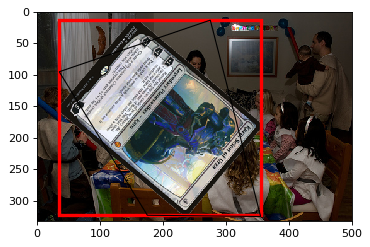

In [12]:
dpi = 80
margin = 0.05 # (5% of the width/height of the figure...)
#xpixels, ypixels = 800, 800

width, height = composite.size

# Make a figure big enough to accomodate an axis of xpixels by ypixels
# as well as the ticklabels, etc...
figsize = (1 + margin) * height / dpi, (1 + margin) * width / dpi

fig = plt.figure(figsize=figsize, dpi=dpi)
# Make the axis the right size...
ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

ax.imshow(composite, interpolation='none')
ymin, xmin, ymax, xmax = bbox
rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor=(1, 0, 0), linewidth=3)
ax.add_patch(rect)
pdim = [
    [275, ymin],
    [xmax, 325],
    [175, ymax],
    [xmin, 95]
]
poly = Polygon(pdim, True, fill=False)
ax.add_patch(poly)
plt.show()

In [37]:
# Following https://www.immersivelimit.com/tutorials/composing-images-with-python-for-synthetic-datasets
# sometimes this throws a 'composite not defined' error?
foreground_dir = os.path.join(OUTDIR, 'c18')
background_dir = os.path.join(OUTDIR, 'tables')

output_dir = os.path.join(OUTDIR, 'generated')

foregrounds = glob.glob(foreground_dir+"/*.png")
backgrounds = glob.glob(background_dir+"/*.jpg")

# Create a list to keep track of images and mask annotations
csv_lines = []

# Generate 5 new images
n_generated_images = 10
for i in range(n_generated_images):
    foreground_path = random.choice(foregrounds)
    background_path = random.choice(backgrounds)
    try:
        composite, mask, bbox = compose_images(foreground_path, background_path)
    except OSError:
        next
        
    
    composite_path = os.path.join(output_dir, 'image_{0:04d}.png'.format(i))
    composite.save(composite_path)
    
    #mask_path = os.path.join(output_dir, 'mask_{0:04d}.png'.format(i))
    #mask.save(mask_path)
    
    width, height = composite.size
    csv_lines.append([width, height, bbox, composite_path])



In [ ]:
# Generating test data
test_dir = os.path.join(OUTDIR, 'test')

# Generate 5 new images
for i in range(10):
    foreground_path = random.choice(foregrounds)
    background_path = random.choice(backgrounds)
    try:
        composite, mask, bbox = compose_images(foreground_path, background_path)
    except OSError:
        next

    composite_path = os.path.join(test_dir, 'image_{0:04d}.png'.format(i))
    composite.save(composite_path)
    
    mask_path = os.path.join(output_dir, 'mask_{0:04d}.png'.format(i))
    mask.save(mask_path)
    
    width, height = composite.size


In [ ]:
# Output the annotations csv
# Using file layout from here: https://mxnet.incubator.apache.org/versions/master/api/python/image/image.html
# id header_width object_width object_id, xmin, ymin, xmax, ymax image_path
annotations_csv_path = os.path.join(OUTDIR, 'train.lst')
with open(annotations_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for idx, csv_line in enumerate(csv_lines):
        width = csv_line[0]
        height = csv_line[1]
        bbox = csv_line[2]
        image_path = csv_line[3]
        outrow = [idx, 4, 5, width, height, idx, bbox[0] / height, bbox[1] / width, bbox[2] / height, bbox[3] / width, image_path]
        writer.writerow(outrow)

In [ ]:
batch_size = 32 # Number of examples per batch, some examples are 4, pikachu uses 32
data_shape = 256 # Data shape in (channels, height, width) format. For now, only RGB image with 3 channels is supported.
                 # some example had 224, but pikachu example uses 256
data_iter = mx.image.ImageDetIter(batch_size=batch_size, data_shape=(3, data_shape, data_shape),
                                      path_imglist=OUTDIR+'/train.lst', path_root='/')

In [ ]:
# https://gluon.mxnet.io/chapter08_computer-vision/object-detection.html
data_iter.reset()
batch = data_iter.next()
#print(batch)
#data_shape = 256

i = 9

img = batch.data[0][i].asnumpy()  # grab the first image, convert to numpy array
img = img.transpose((1, 2, 0))  # we want channel to be the last dimension
#img += np.array([123, 117, 104])
img = img.astype(np.uint8)  # use uint8 (0-255)

# Create figure and axes
fig,ax = plt.subplots(1)
ax.imshow(img)

# draw bounding boxes on image
for label in batch.label[0][i].asnumpy():
    if label[0] < 0:
        print("MISSING LABEL????")
        break
    print(label)
    ymin, xmin, ymax, xmax = [int(x * data_shape) for x in label[1:5]]
    #xmin, ymin, xmax, ymax = label[1:5]
    # scale to new size
    #xmin, ymin, xmax, ymax = 58, 179, 150, 279
    #xmin, ymin, xmax, ymax = label[, 179, 150, 279
    rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor=(1, 0, 0), linewidth=3)
    ax.add_patch(rect)

plt.show()

In [ ]:
data_iter.reset()
batch = data_iter.next()
data = batch.data[0]
#for i in range(4):
#    plt.subplot(1,4,i+1)
#    plt.imshow(data[i].asnumpy().astype(np.uint8).transpose((1,2,0)))
plt.imshow(data[1].asnumpy().astype(np.uint8).transpose((1,2,0)))
plt.show()

In [ ]:
# Working forward from https://gluon.mxnet.io/chapter08_computer-vision/object-detection.html

In [ ]:
import mxnet as mx
from mxnet import nd
from mxnet.contrib.ndarray import MultiBoxPrior

n = 40
# shape: batch x channel x height x weight
x = nd.random_uniform(shape=(1, 3, n, n))

y = MultiBoxPrior(x, sizes=[.5, .25, .1], ratios=[1, 2, .5])

# the first anchor box generated for pixel at (20,20)
# its format is (x_min, y_min, x_max, y_max)
boxes = y.reshape((n, n, -1, 4))
print('The first anchor box at row 21, column 21:', boxes[20, 20, 0, :])

In [ ]:
import matplotlib.pyplot as plt
def box_to_rect(box, color, linewidth=3):
    """convert an anchor box to a matplotlib rectangle"""
    box = box.asnumpy()
    return plt.Rectangle(
        (box[0], box[1]), (box[2]-box[0]), (box[3]-box[1]),
        fill=False, edgecolor=color, linewidth=linewidth)
colors = ['blue', 'green', 'red', 'black', 'magenta']
plt.imshow(nd.ones((n, n, 3)).asnumpy())
anchors = boxes[20, 20, :, :]
for i in range(anchors.shape[0]):
    plt.gca().add_patch(box_to_rect(anchors[i,:]*n, colors[i]))
plt.show()

In [ ]:
from mxnet.gluon import nn
def class_predictor(num_anchors, num_classes):
    """return a layer to predict classes"""
    return nn.Conv2D(num_anchors * (num_classes + 1), 3, padding=1)

cls_pred = class_predictor(5, 10)
cls_pred.initialize()
x = nd.zeros((2, 3, 20, 20))
print('Class prediction', cls_pred(x).shape)

In [ ]:
def box_predictor(num_anchors):
    """return a layer to predict delta locations"""
    return nn.Conv2D(num_anchors * 4, 3, padding=1)

box_pred = box_predictor(10)
box_pred.initialize()
x = nd.zeros((2, 3, 20, 20))
print('Box prediction', box_pred(x).shape)

In [ ]:
def down_sample(num_filters):
    """stack two Conv-BatchNorm-Relu blocks and then a pooling layer
    to halve the feature size"""
    out = nn.HybridSequential()
    for _ in range(2):
        out.add(nn.Conv2D(num_filters, 3, strides=1, padding=1))
        out.add(nn.BatchNorm(in_channels=num_filters))
        out.add(nn.Activation('relu'))
    out.add(nn.MaxPool2D(2))
    return out

blk = down_sample(10)
blk.initialize()
x = nd.zeros((2, 3, 20, 20))
print('Before', x.shape, 'after', blk(x).shape)

In [ ]:
# a certain feature map with 20x20 spatial shape
feat1 = nd.zeros((2, 8, 20, 20))
print('Feature map 1', feat1.shape)
cls_pred1 = class_predictor(5, 10)
cls_pred1.initialize()
y1 = cls_pred1(feat1)
print('Class prediction for feature map 1', y1.shape)
# down-sample
ds = down_sample(16)
ds.initialize()
feat2 = ds(feat1)
print('Feature map 2', feat2.shape)
cls_pred2 = class_predictor(3, 10)
cls_pred2.initialize()
y2 = cls_pred2(feat2)
print('Class prediction for feature map 2', y2.shape)

In [ ]:
def flatten_prediction(pred):
    return nd.flatten(nd.transpose(pred, axes=(0, 2, 3, 1)))

def concat_predictions(preds):
    return nd.concat(*preds, dim=1)

flat_y1 = flatten_prediction(y1)
print('Flatten class prediction 1', flat_y1.shape)
flat_y2 = flatten_prediction(y2)
print('Flatten class prediction 2', flat_y2.shape)
print('Concat class predictions', concat_predictions([flat_y1, flat_y2]).shape)

In [ ]:
# TODO This needs to be made something actual?
# from the text: Common choices follow the architectures of the state-of-the-art convolution neural 
# networks for image classification. For demonstration purpose, we just stack several down sampling 
# blocks to form the body network.
from mxnet import gluon
def body():
    """return the body network"""
    out = nn.HybridSequential()
    for nfilters in [16, 32, 64]:
        out.add(down_sample(nfilters))
    return out

bnet = body()
bnet.initialize()
x = nd.zeros((2, 3, 256, 256))
print('Body network', [y.shape for y in bnet(x)])

In [ ]:
def toy_ssd_model(num_anchors, num_classes):
    """return SSD modules"""
    downsamples = nn.Sequential()
    class_preds = nn.Sequential()
    box_preds = nn.Sequential()

    downsamples.add(down_sample(128))
    downsamples.add(down_sample(128))
    downsamples.add(down_sample(128))

    for scale in range(5):
        class_preds.add(class_predictor(num_anchors, num_classes))
        box_preds.add(box_predictor(num_anchors))

    return body(), downsamples, class_preds, box_preds

print(toy_ssd_model(5, 2))

In [ ]:
def toy_ssd_forward(x, body, downsamples, class_preds, box_preds, sizes, ratios):
    # extract feature with the body network
    x = body(x)

    # for each scale, add anchors, box and class predictions,
    # then compute the input to next scale
    default_anchors = []
    predicted_boxes = []
    predicted_classes = []

    for i in range(5):
        default_anchors.append(MultiBoxPrior(x, sizes=sizes[i], ratios=ratios[i]))
        predicted_boxes.append(flatten_prediction(box_preds[i](x)))
        predicted_classes.append(flatten_prediction(class_preds[i](x)))
        if i < 3:
            x = downsamples[i](x)
        elif i == 3:
            # simply use the pooling layer
            x = nd.Pooling(x, global_pool=True, pool_type='max', kernel=(4, 4))

    return default_anchors, predicted_classes, predicted_boxes

In [ ]:
from mxnet import gluon
class ToySSD(gluon.Block):
    def __init__(self, num_classes, **kwargs):
        super(ToySSD, self).__init__(**kwargs)
        # anchor box sizes for 4 feature scales
        self.anchor_sizes = [[.2, .272], [.37, .447], [.54, .619], [.71, .79], [.88, .961]]
        # anchor box ratios for 4 feature scales
        self.anchor_ratios = [[1, 2, .5]] * 5
        self.num_classes = num_classes

        with self.name_scope():
            self.body, self.downsamples, self.class_preds, self.box_preds = toy_ssd_model(4, num_classes)

    def forward(self, x):
        default_anchors, predicted_classes, predicted_boxes = toy_ssd_forward(x, self.body, self.downsamples,
            self.class_preds, self.box_preds, self.anchor_sizes, self.anchor_ratios)
        # we want to concatenate anchors, class predictions, box predictions from different layers
        anchors = concat_predictions(default_anchors)
        box_preds = concat_predictions(predicted_boxes)
        class_preds = concat_predictions(predicted_classes)
        # it is better to have class predictions reshaped for softmax computation
        class_preds = nd.reshape(class_preds, shape=(0, -1, self.num_classes + 1))

        return anchors, class_preds, box_preds

In [ ]:
# instantiate a ToySSD network with 10 classes
net = ToySSD(2)
net.initialize()
x = nd.zeros((1, 3, 256, 256))
default_anchors, class_predictions, box_predictions = net(x)
print('Outputs:', 'anchors', default_anchors.shape, 'class prediction', class_predictions.shape, 'box prediction', box_predictions.shape)


In [ ]:
class_names = ['magic_card']
num_class = len(class_names)
train_data = data_iter

In [ ]:
from mxnet.contrib.ndarray import MultiBoxTarget
def training_targets(default_anchors, class_predicts, labels):
    class_predicts = nd.transpose(class_predicts, axes=(0, 2, 1))
    z = MultiBoxTarget(*[default_anchors, labels, class_predicts])
    box_target = z[0]  # box offset target for (x, y, width, height)
    box_mask = z[1]  # mask is used to ignore box offsets we don't want to penalize, e.g. negative samples
    cls_target = z[2]  # cls_target is an array of labels for all anchors boxes
    return box_target, box_mask, cls_target

In [ ]:
from mxnet import gluon
class FocalLoss(gluon.loss.Loss):
    def __init__(self, axis=-1, alpha=0.25, gamma=2, batch_axis=0, **kwargs):
        super(FocalLoss, self).__init__(None, batch_axis, **kwargs)
        self._axis = axis
        self._alpha = alpha
        self._gamma = gamma

    def hybrid_forward(self, F, output, label):
        output = F.softmax(output)
        pt = F.pick(output, label, axis=self._axis, keepdims=True)
        loss = -self._alpha * ((1 - pt) ** self._gamma) * F.log(pt)
        return F.mean(loss, axis=self._batch_axis, exclude=True)

# cls_loss = gluon.loss.SoftmaxCrossEntropyLoss()
cls_loss = FocalLoss()
print(cls_loss)


In [ ]:
class SmoothL1Loss(gluon.loss.Loss):
    def __init__(self, batch_axis=0, **kwargs):
        super(SmoothL1Loss, self).__init__(None, batch_axis, **kwargs)

    def hybrid_forward(self, F, output, label, mask):
        loss = F.smooth_l1((output - label) * mask, scalar=1.0)
        return F.mean(loss, self._batch_axis, exclude=True)

box_loss = SmoothL1Loss()
print(box_loss)

In [ ]:
cls_metric = mx.metric.Accuracy()
box_metric = mx.metric.MAE()  # measure absolute difference between prediction and target

In [ ]:
from mxnet import nd
### Set context for training
ctx = mx.gpu()  # it may takes too long to train using CPU
try:
    _ = nd.zeros(1, ctx=ctx)
    # pad label for cuda implementation
    train_data.reshape(label_shape=(3, 5))
    train_data = test_data.sync_label_shape(train_data)
except mx.base.MXNetError as err:
    print('No GPU enabled, fall back to CPU, sit back and be patient...')
    ctx = mx.cpu()

# This reports no GPU...
# Looks like I'd need to follow instructions here to get it to work:
# https://mxnet.incubator.apache.org/install/index.html

In [ ]:
net = ToySSD(num_class)
net.initialize(mx.init.Xavier(magnitude=2), ctx=ctx)

In [ ]:
net.collect_params().reset_ctx(ctx)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1, 'wd': 5e-4})

In [ ]:
# DID YOU SET train_data above?
#epochs = 150  # set larger to get better performance
epochs = 50
log_interval = 20
from_scratch = True  # set to True to train from scratch
if from_scratch:
    start_epoch = 0
else:
    start_epoch = 148
    pretrained = 'ssd_pretrained.params'
    sha1 = 'fbb7d872d76355fff1790d864c2238decdb452bc'
    url = 'https://apache-mxnet.s3-accelerate.amazonaws.com/gluon/models/ssd_pikachu-fbb7d872.params'
    if not osp.exists(pretrained) or not verified(pretrained, sha1):
        print('Downloading', pretrained, url)
        download(url, fname=pretrained, overwrite=True)
    net.load_params(pretrained, ctx)

In [ ]:
import time
from mxnet import autograd as ag
for epoch in range(start_epoch, epochs):
    # reset iterator and tick
    train_data.reset()
    cls_metric.reset()
    box_metric.reset()
    tic = time.time()
    # iterate through all batch
    for i, batch in enumerate(train_data):
        btic = time.time()
        # record gradients
        with ag.record():
            x = batch.data[0].as_in_context(ctx)
            y = batch.label[0].as_in_context(ctx)
            default_anchors, class_predictions, box_predictions = net(x)
            box_target, box_mask, cls_target = training_targets(default_anchors, class_predictions, y)
            # losses
            loss1 = cls_loss(class_predictions, cls_target)
            loss2 = box_loss(box_predictions, box_target, box_mask)
            # sum all losses
            loss = loss1 + loss2
            # backpropagate
            loss.backward()
        # apply
        trainer.step(batch_size)
        # update metrics
        cls_metric.update([cls_target], [nd.transpose(class_predictions, (0, 2, 1))])
        box_metric.update([box_target], [box_predictions * box_mask])
        if (i + 1) % log_interval == 0:
            name1, val1 = cls_metric.get()
            name2, val2 = box_metric.get()
            print('[Epoch %d Batch %d] speed: %f samples/s, training: %s=%f, %s=%f'
                  %(epoch ,i, batch_size/(time.time()-btic), name1, val1, name2, val2))

    # end of epoch logging
    name1, val1 = cls_metric.get()
    name2, val2 = box_metric.get()
    print('[Epoch %d] training: %s=%f, %s=%f'%(epoch, name1, val1, name2, val2))
    print('[Epoch %d] time cost: %f'%(epoch, time.time()-tic))

print('{} training images, {} epochs (%f)'.format(n_generated_images, epochs, time.time()-tic))    
# we can save the trained parameters to disk
net.save_params('ssd_%d.params' % epochs)

In [ ]:
# Test
import numpy as np
import cv2
def preprocess(image):
    """Takes an image and apply preprocess"""
    # resize to data_shape
    image = cv2.resize(image, (data_shape, data_shape))
    # swap BGR to RGB
    image = image[:, :, (2, 1, 0)]
    # convert to float before subtracting mean
    image = image.astype(np.float32)
    # subtract mean
    image -= np.array([123, 117, 104])
    # organize as [batch-channel-height-width]
    image = np.transpose(image, (2, 0, 1))
    image = image[np.newaxis, :]
    # convert to ndarray
    image = nd.array(image)
    return image
i = 0
image = cv2.imread(os.path.join(test_dir, 'image_{0:04d}.png'.format(i)))
x = preprocess(image)
print('x', x.shape)

In [ ]:
# if pre-trained model is provided, we can load it
# net.load_params('ssd_%d.params' % epochs, ctx)
anchors, cls_preds, box_preds = net(x.as_in_context(ctx))
print('anchors', anchors)
print('class predictions', cls_preds)
print('box delta predictions', box_preds)

In [ ]:
from mxnet.contrib.ndarray import MultiBoxDetection
# convert predictions to probabilities using softmax
cls_probs = nd.SoftmaxActivation(nd.transpose(cls_preds, (0, 2, 1)), mode='channel')
# apply shifts to anchors boxes, non-maximum-suppression, etc...
output = MultiBoxDetection(*[cls_probs, box_preds, anchors], force_suppress=True, clip=False)
print(output)

In [ ]:
def display(img, out, thresh=0.5):
    import random
    import matplotlib as mpl
    mpl.rcParams['figure.figsize'] = (10,10)
    pens = dict()
    plt.clf()
    plt.imshow(img)
    for det in out:
        cid = int(det[0])
        if cid < 0:
            continue
        score = det[1]
        if score < thresh:
            continue
        if cid not in pens:
            pens[cid] = (random.random(), random.random(), random.random())
        scales = [img.shape[1], img.shape[0]] * 2
        xmin, ymin, xmax, ymax = [int(p * s) for p, s in zip(det[2:6].tolist(), scales)]
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False,
                             edgecolor=pens[cid], linewidth=3)
        plt.gca().add_patch(rect)
        text = class_names[cid]
        plt.gca().text(xmin, ymin-2, '{:s} {:.3f}'.format(text, score),
                       bbox=dict(facecolor=pens[cid], alpha=0.5),
                       fontsize=12, color='white')
    plt.show()

thresh = 0.45
#thresh = 0.55
display(image[:, :, (2, 1, 0)], output[0].asnumpy(), thresh=thresh)

## Export the model to SageMaker

We're following the instructions from [here](https://github.com/awslabs/amazon-sagemaker-examples/blob/master/advanced_functionality/mxnet_mnist_byom/mxnet_mnist.ipynb) starting with **Set up hosting for the model**

In [ ]:
# TODO: THis? https://mxnet.incubator.apache.org/tutorials/gluon/save_load_params.html

import os
import json
#os.mkdir('model')

savedir = 'data/model'

#net.save_checkpoint(savedir + '/model', 0000)
#with open ( savedir + '/model-shapes.json', "w") as shapes:
#    json.dump([{"shape": net.data_shapes[0][1], "name": "data"}], shapes)

net.export(savedir, epochs)

import tarfile
def flatten(tarinfo):
    tarinfo.name = os.path.basename(tarinfo.name)
    return tarinfo

tar = tarfile.open("data/model.tar.gz", "w:gz")
tar.add(savedir, filter=flatten)
tar.close()


In [21]:
a, b, c = [1, 44, 77]
x = [a, b, c]
x

[1, 44, 77]

In [44]:
N = 3
np.random.rand(N, 2)

array([[0.20767573, 0.37706861],
       [0.8428173 , 0.43861981],
       [0.78541588, 0.48331643]])

In [ ]:
import time

query = input("Type the name of the set: ")

time.sleep(0.05)
sets = scrython.sets.Sets()

for i in range(sets.data_length()):
    if sets.set_name(i) == query:
        print("Set code:", sets.set_code(i).upper())
        break
    else:
        continue